## Imported Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

## Reading insurance.xls file

In [40]:
data=pd.read_csv('insurance.csv')
data.head(17)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Each Column Info

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## Statistical information for insurance.xls file

In [42]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Count Missing Values in Data

In [43]:
count_nan=data.isnull().sum()
count_nan[count_nan>0]

Series([], dtype: int64)

## Fill Missing Values by Mean of the Column

In [44]:
mean=data['bmi'].mean()
data['bmi'].fillna(mean,inplace=True)

In [45]:
count_nan.isnull()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [46]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Visualization for 'age' and 'bmi' columns using seaborn

## Info- Healthy range of bmi is 18.5 to 24.9.

In [47]:
dataset2 = data[["age", "bmi", "children","charges"]]
dataset2.iplot()

In [48]:
#sns.scatterplot(x='age',y='bmi',data=data,hue='smoker')
data.iplot(kind='scatter', x='age', y='bmi', mode='markers')

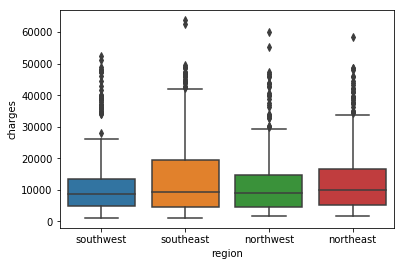

In [49]:
sns.boxplot(x='region',y='charges',data=data)

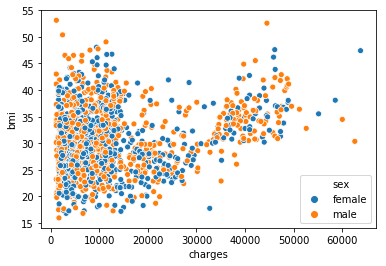

In [50]:
sns.scatterplot(x='charges',y='bmi',data=data,hue='sex')

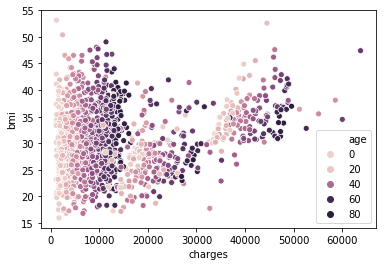

In [51]:
sns.scatterplot(x='charges',y='bmi',data=data,hue='age')

## Conclusion- people in data set are not that healthy as violating the bmi range
## All ages have variant bmi                   

## Giving labels to the data as 0 or 1

In [52]:
from sklearn.preprocessing import LabelEncoder

## To locate sex and smoker status in main data

In [83]:
s_location=data.iloc[:,1:2].values
smoker_location=data.iloc[:,4:5].values

## Smoker data is divided into, if 'yes'=1, if 'no'=0

In [84]:
# creating initial dataframe
smoker_df = pd.DataFrame(smoker_location)

# creating instance of labelencoder
le1 = LabelEncoder()

# Assigning numerical values and storing in another column
smoker_df['smoker_df_label'] = le1.fit_transform(smoker_df)
smoker_df

,0,smoker_df_label
0,yes,1
1,no,0
2,no,0
3,no,0
4,no,0
5,no,0
6,no,0
7,no,0
8,no,0
9,no,0


## Sex data is divided as female=0 and male=1

In [85]:
sex_df = pd.DataFrame(s_location)

# creating instance of labelencoder
le2 = LabelEncoder()

# Assigning numerical values and storing in another column
sex_df['sex_df_label'] = le2.fit_transform(sex_df)
sex_df

,0,sex_df_label
0,female,0
1,male,1
2,male,1
3,male,1
4,male,1
5,female,0
6,female,0
7,female,0
8,male,1
9,female,0
